In [ ]:
from numpy import *
import pandas as pd

In [ ]:
dataMatrix = pd.read_csv('testSet.txt',header=None).get_values()

In [ ]:
print(dataMatrix)

In [ ]:
def distEclud(vecA,vecB):
    return sqrt(sum(power(vecA-vecB,2)))

In [ ]:
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))
    for j in range(n):
        #print("J={}".format(j))
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    return centroids
    

In [ ]:
randCent(dataMatrix,2)

In [ ]:
distEclud(dataMatrix[0],dataMatrix[1])

In [ ]:
shape(dataMatrix)[0]

In [18]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    #Find the number of items in the dataset
    m = shape(dataSet)[0]
    '''
    Create a cluster Assignment Matrix
    First column is the index of the cluster & the 2nd column to store the error
    The error is the distance from the cluster centroid to the current point
    '''
    clusterAssment = mat(zeros((m,2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf; minIndex = -1
            #find the closest centroid Begin
            for j in range(k):
                ## Calculate the error for the current point
                #print("compute distance for Centroids = {} .. Clusters = {} ".format(centroids[j,:],dataSet[i,:]))
                distJI = distMeas(centroids[j,:],dataSet)
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            #find the closest centroid End
            if clusterAssment[i,0] != minIndex: 
                clusterChanged = True
                clusterAssment[i,:] = minIndex,minDist**2
                print(clusterAssment)
        print("Centroids = {} .. Clusters = {} ".format(centroids,clusterAssment))
        
        #Update the centroid Begin
        for cent in range(k):
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:] = mean(ptsInClust,axis=0)
        #Update the centroid End
    return centroids, clusterAssment

In [19]:
clusters = pd.DataFrame(kMeans(dataMatrix,4)[1])

[[   3.         2016.79356288]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0.            0.        ]
 [   0. 

C:\Users\rohit_v03\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\rohit_v03\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [21]:
import seaborn as sns

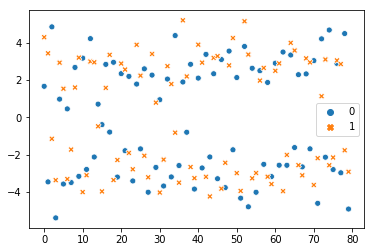

In [30]:
sns.scatterplot(data=dataMatrix)

In [34]:
clusters[1].unique

<bound method Series.unique of 0     2016.793563
1     2016.793563
2     2016.793563
3     2016.793563
4     2016.793563
5     2016.793563
6     2016.793563
7     2016.793563
8     2016.793563
9     2016.793563
10    2016.793563
11    2016.793563
12    2016.793563
13    2016.793563
14    2016.793563
15    2016.793563
16    2016.793563
17    2016.793563
18    2016.793563
19    2016.793563
20    2016.793563
21    2016.793563
22    2016.793563
23    2016.793563
24    2016.793563
25    2016.793563
26    2016.793563
27    2016.793563
28    2016.793563
29    2016.793563
         ...     
50    2016.793563
51    2016.793563
52    2016.793563
53    2016.793563
54    2016.793563
55    2016.793563
56    2016.793563
57    2016.793563
58    2016.793563
59    2016.793563
60    2016.793563
61    2016.793563
62    2016.793563
63    2016.793563
64    2016.793563
65    2016.793563
66    2016.793563
67    2016.793563
68    2016.793563
69    2016.793563
70    2016.793563
71    2016.793563
72    2016.7935